_Il n’y a pas d’attributs publics, pourquoi ?_

Il n'y a pas de modèles, tout est calculé à partir des données de départ

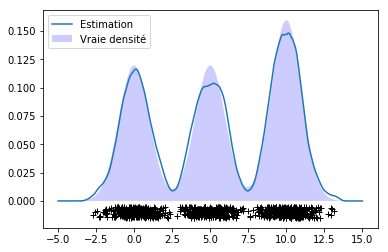

In [1]:
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Parameters
N = 1000
bandwidth = 0.75
kernel='cosine'
# générer l'échantillon
E1 = np.random.normal(0, 1, int(0.3 * N))
E2 = np.random.normal(5, 1, int(0.3 * N))
E3 = np.random.normal(10, 1, int(0.4 * N))
X = np.concatenate((E1,E2, E3))[:, np.newaxis]

# préparer les points où on calculera la densité
X_plot = np.linspace(-5, 15, 1000)[:, np.newaxis]

true_density = (0.3*norm(0,1).pdf(X_plot[:,0]) 
                + 0.3*norm(5,1).pdf(X_plot[:,0]) + 0.4*norm(10,1).pdf(X_plot[:,0]))

# estimation par noyau gaussien
kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(X)

# calcul de la densité pour les données de X_plot
density = np.exp(kde.score_samples(X_plot))

# affichage : vraie densité et estimation
fig, ax = plt.subplots()
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.show()

Il est possible de générer de nouvelles données suivant cette densité estimée et de visualiser le résultat d’une nouvelle estimation faite à partir de ces dernières données :

In [2]:
Xg = kde.sample(N)
kde2 = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(Xg)
fig, ax = plt.subplots()
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X_plot[:,0], np.exp(kde2.score_samples(X_plot)), 'r-', label="Estimation2")
ax.legend(loc='upper left')
plt.show()

NotImplementedError: 

## Question 
_Faites varier la taille de l’échantillon et examinez les résultats._
On constate que plus N est petit, moins la densité trouvée est éloignée de la densité réelle

## Question
_Faites varier le nombre de lois normales lors de la génération de l’échantillon et examinez les résultats._

On obtient encore un noyau très proche.
Cependant, les estimations sont réparties sur plusieurs lois, entrainant une forme différente

## Question
_Faites varier la valeur de bandwidth et examinez les résultats._

Plus le bandwidth est petit, plus la densité estimée est sensible aux absences de valeurs
Plus la valeur est grande, moins on observe les spécificités des différentes densités

## Question
_Faites varier le type de noyau et examinez les résultats._
Le tophat semble avoir de bons résultats
On peut seulement générer des valeurs pour gaussian ou tophat

## Et une utilisation sur des données bidimensionnelles 

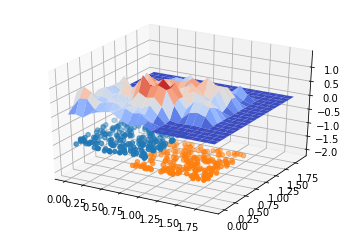

In [3]:
# générer l'échantillon
# définir la largeur de bande pour le noyau
N = 200
kd = np.random.rand(N, 2)
kdb = np.random.rand(N, 2) + [0.5, 0.5]
bw = 0.05

# définir la grille pour la visualisation
grid_size = 10
d = 2
size = d*d*grid_size*grid_size
Gx = np.arange(0, 0 + d, 1/grid_size)
Gy = np.arange(0, 0 + d, 1/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

data = np.concatenate((kd, kdb))
# estimation, puis calcul densité sur la grille
kde3 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(data)
Z = np.exp(kde3.score_samples(np.hstack(((Gx.reshape(size))[:,np.newaxis],
        (Gy.reshape(size)[:,np.newaxis])))))

# affichage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z.reshape(d*grid_size,d*grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(kd[:,0], kd[:,1], -1)
ax.scatter(kdb[:,0], kdb[:,1], -2)
plt.show()

## Question
_Faites varier la valeur de bandwidth et examinez les résultats._

Une valeur faible (Ex: 0.02) entraine une absence de superposition des noyaux.
Une valeur plus grande (ex: 0.2) crée une densité uniforme.

## Question
_Générez l’échantillon à partir d’une somme de 2 lois normales différentes (avec N plus grand) et examinez les résultats._

Pour comprendre ce qu’est une estimation de densité par noyaux, il peut être utile de construire le modèle et visualiser les résultats directement, sans passer par la classe spécifique de Scikit-learn. 

Pour la visualisation directe, nous nous servirons de la fonction de calcul d’une loi normale bidimensionelle en (x,y), bivariate_normal(x,y,sigmax,sigmay,mux,muy,sigmaxy), où
 - mux la moyenne de X
 - muy la moyenne de Y.
 - sigmax est la variance de X
 - sigmay la variance de Y
 - sigmaxy la covariance entre X et Y

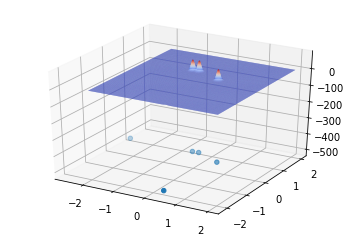

In [4]:
# générer l'échantillon
N = 5
# loi uniforme entre 0 et 1
kd = np.random.rand(N, 2)
kd = np.random.randn(N, 2)

# définir la grille pour la visualisation
dx = 4
dy = 4
grid_size = 100
Gx = np.arange(-2, -2 + dx, 1/grid_size)
Gy = np.arange(-2, -2 + dy, 1/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)
bw = 0.05

# calcul direct de la densité sur la grille
from matplotlib.mlab import bivariate_normal
Z = np.zeros((dx * grid_size,dy * grid_size))
for i in range(N):
        Z = Z + bivariate_normal(Gx,Gy,bw,bw,kd[i,0],kd[i,1],0)

# affichage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)
ax.scatter(kd[:,0], kd[:,1], -500)
plt.show()

## Question
_Faites varier la taille de l’échantillon et examinez les résultats. Quelles sont les conséquences d’une augmentation de N ?_
Le traitement ralentit énormément.

# Estimation à partir des données « textures »
Pour visualiser facilement les résultats, il faudra travailler sur des projections unidimensionnelles ou bidimensionnelles de ces données.

## Question
_Appliquez l’analyse en composantes principales à ces données et estimez la densité des données projetées sur le premier axe principal (ou les deux premiers axes principaux). Faites varier la largeur de « fenêtre » (bandwidth). Visualisez les résultats._



In [5]:
texture = np.loadtxt('texture.dat')
texture = np.genfromtxt('texture.dat', usecols=range(41), delimiter=' ', filling_values=0.0)
print(texture)
print(texture.shape)
lcls = lcls = np.genfromtxt('texture.dat', dtype=int, usecols=(41), delimiter=' ', filling_values=0.0)
print("LCLS = {}".format(lcls))
print(lcls.shape)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

t2d = pca.fit_transform(texture)
print(pca.explained_variance_ratio_)
print(pca.components_)

# Estimation de la densité
kde3 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(t2d)

# Construction de la surface
import math
print("MIN")
print(t2d.min(0).shape)
min_x = math.floor(t2d.min(0)[0])
min_y = math.floor(t2d.min(0)[1])
max_x = math.ceil(t2d.max(0)[0])
max_y = math.ceil(t2d.max(0)[1])
print("({}, {}) => ({}, {})".format(min_x, min_y, max_x, max_y))

size_x = int(max_x - min_x)
size_y = int(max_y - min_y)
print("{} -> {}".format(size_x, size_y))
grid_size = 10
Gx = np.arange(min_x, max_x, 1/grid_size)
Gy = np.arange(min_y, max_y, 1/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)
print(Gx.shape)

size = size_x * size_y * grid_size * grid_size

print(size)

[[-1.2226029  -0.7977774  -0.86744218 ..., -0.56776317 -0.60677845  0.        ]
 [-1.41017201 -1.02930747 -1.01340275 ..., -0.69813757 -0.8170717   0.        ]
 [-1.10704682 -0.64864318 -0.62945181 ..., -0.37924934 -0.4692179   0.        ]
 ..., 
 [-1.20310108 -0.45243592 -0.11795048 ..., -0.32519981 -0.15143455  0.        ]
 [-1.10677333 -0.38506918 -0.54993519 ..., -0.47804433 -0.49562071  0.        ]
 [-0.80406177 -0.23076511 -0.5152167  ..., -0.39512912 -0.34932383
  -0.35128498]]
(5500, 41)
LCLS = [ 2  2  2 ..., 14 14  0]
(5500,)
[ 0.65216704  0.09591935]
[[ 0.09387723  0.12937658  0.2129378   0.14525258  0.1545498   0.1319982
   0.15320526  0.15032442  0.14915838  0.22544754  0.1431201   0.12973244
   0.19949261  0.15493057  0.11930655  0.13042065  0.15790992  0.13264561
   0.14765759  0.2050216   0.19825322  0.14494472  0.14458506  0.14073164
   0.15164217  0.15090541  0.18605979  0.16439769  0.16044793  0.19272306
   0.19413925  0.13241415  0.17166934  0.14074305  0.13399377  0

In [6]:
Z = np.exp(kde3.score_samples(np.hstack(((Gx.reshape(size))[:,np.newaxis],
        (Gy.reshape(size)[:,np.newaxis])))))

print(Gx.shape)
print(Gy.shape)
print(Z.reshape(size_x * grid_size, size_y * grid_size).shape)


(40, 90)
(40, 90)
(90, 40)


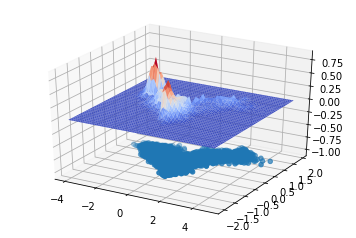

In [7]:
# affichage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z.reshape(size_y * grid_size, size_x * grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(t2d[:,0], t2d[:,1], -1)
plt.show()

## Question
_Appliquez l’analyse discriminante à ces données et estimez la densité des données projetées sur le premier axe discriminant (ou les deux premiers axes discriminants). Faites varier la largeur de « fenêtre » (bandwidth). Visualisez les résultats._

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
t11d = lda.fit_transform(texture, lcls)

print("SHAPE T2D")
print(t11d.shape)
print(t11d[:, 0:2].shape)

t2d = t11d[:, 0:2]

# Estimation de la densité
kde3 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(t2d)

# Construction de la surface
import math
print("MIN")
print(t2d.min(0).shape)
min_x = math.floor(t2d.min(0)[0])
min_y = math.floor(t2d.min(0)[1])
max_x = math.ceil(t2d.max(0)[0])
max_y = math.ceil(t2d.max(0)[1])
print("({}, {}) => ({}, {})".format(min_x, min_y, max_x, max_y))

size_x = int(max_x - min_x)
size_y = int(max_y - min_y)
print("{} -> {}".format(size_x, size_y))
grid_size = 10
Gx = np.arange(min_x, max_x, 1/grid_size)
Gy = np.arange(min_y, max_y, 1/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)
print(Gx.shape)

size = size_x * size_y * grid_size * grid_size

print(size)

Z = np.exp(kde3.score_samples(np.hstack(((Gx.reshape(size))[:,np.newaxis],
        (Gy.reshape(size)[:,np.newaxis])))))

print(Gx.shape)
print(Gy.shape)
print(Z.reshape(size_x * grid_size, size_y * grid_size).shape)


SHAPE T2D
(5500, 11)
(5500, 2)
MIN
(2,)
(-18, -14) => (7, 9)
25 -> 23
(230, 250)
57500
(230, 250)
(230, 250)
(250, 230)


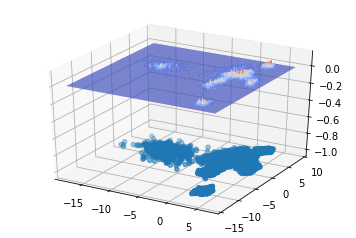

In [16]:
# affichage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z.reshape(size_y * grid_size, size_x * grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(t2d[:,0], t2d[:,1], -1)
plt.show()